In [15]:

import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

ROWS = 5
COLUMNS = 5

#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']


data =  np.loadtxt('./matrix-multiplication/data/random_canon_r5_c5.csv',dtype = str, delimiter = ',')
names = data[0]
data = data[1:]

extraSUSPs = np.loadtxt('./matrix-multiplication/data/random_canon_SUSPs_r5_c5.csv',dtype = str, delimiter = ',')
extraSUSPs = extraSUSPs[1:]


data = np.concatenate([data, extraSUSPs])


y = data[:,-1]
X = data[:,18:-1] #Removes actual rows as features

#X = data[:,15:18]
print(X[0])

#le = preprocessing.LabelEncoder()

#for i in range(ROWS+COLUMNS):
#    X[:,i] = le.fit_transform(X[:,i])

#print(names)

X = X.astype(np.float)

y = y.astype(int)

print(X[0])

#print(y[6])

#print(y[0])

#cat_features = [0, 1, 2, 3 ,4 ,5 ,6 ,7 ,8 ,9]
#enc = preprocessing.OneHotEncoder(categorical_features=cat_features)
#enc.fit(X)

#print(enc.n_values_)
#print(enc.feature_indices_)
#X = enc.transform(X).toarray()
#print(X[0])


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print(len(x_train))
print(len(x_test))


['0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0'
 '1' '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1'
 '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0'
 '1' '0' '0']
[0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0.]
120000
30000


In [16]:
trues = 0
for num in y_train:
    if num == 1:
        trues+=1

total = len(y_train)
falsenum = total-trues

print("baseline: ", falsenum/total)
print("Number of SUSPs: ",trues)

numFeatures = len(X[0])
print("Num of Features: ", numFeatures)

baseline:  0.6186
Number of SUSPs:  45768
Num of Features:  75


In [ ]:


%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

from sklearn.feature_selection import RFE


# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN5', KNeighborsClassifier()))
models.append(('KN7', KNeighborsClassifier(n_neighbors=7)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LIN', SVC(kernel='linear',gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# evaluate each model in turn
# note that I'm going to run through each model above
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure

results = []
classifiers = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	classifiers.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

    
    
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(classifiers)
plt.show()

#print('\n***Performing t-tests***\n\n')

    
#ttest,pval = stats.ttest_rel(results[0], results[1])
#print('P-Val between ZeroR and Logistic Regression: %.2f' % pval)

#if pval<0.05:
#    print("reject null hypothesis")
#else:
#    print("accept null hypothesis") 

#print()    




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 500)               38000     
_________________________________________________________________
dense_23 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_24 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_25 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 202       
Total para

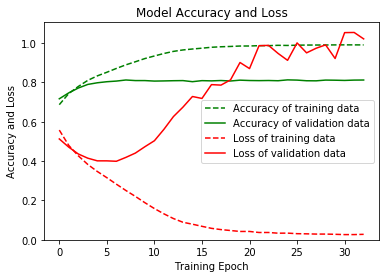


--- Check against test data ---

30000/30000 [==============================] - 2s 57us/step

Accuracy on test data: 0.81

Loss on test data: 1.07


In [17]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import Dropout
from matplotlib import pyplot as plt

import keras

model_m = Sequential()
model_m.add(Dense(500, activation='relu', input_shape=(numFeatures,)))
model_m.add(Dense(500, activation='relu'))
model_m.add(Dense(250, activation='relu'))
model_m.add(Dense(250, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
#model_m.add(Dropout(0.5))
model_m.add(Dense(2, activation='softmax'))
print(model_m.summary())


callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=2)
]

model_m.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 400
EPOCHS = 50

history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)


print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

#%%

print("\n--- Check against test data ---\n")


#8 by 5, 9 by 5

score = model_m.evaluate(x_test, y_test, verbose=1)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])


In [26]:
from keras.models import load_model
import time

modelName = "best_model.07-0.40.h5"

model = load_model(modelName)
model.summary()

first = time.time()

score = model_m.evaluate(x_test, y_test, verbose=1)

end = time.time()

total = end - first

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

print("Total Time: ", total)
print("Time Per: ", total/len(x_test))

print(len(x_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 500)               38000     
_________________________________________________________________
dense_23 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_24 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_25 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 202       
Total para